In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


Train Features Shape: (23814, 876)
Train Targets Shape: (23814, 207)
Test Features Shape: (3982, 876)
Train Features Preview:
          sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670

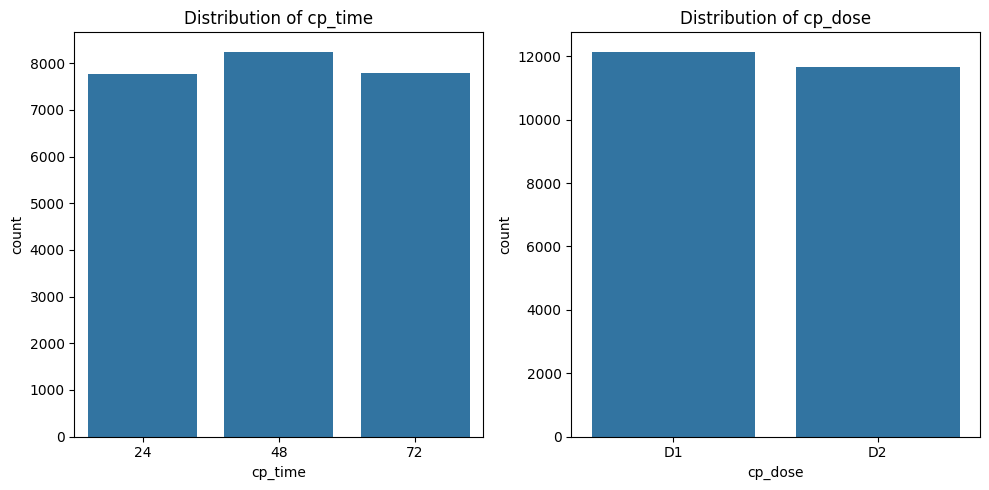

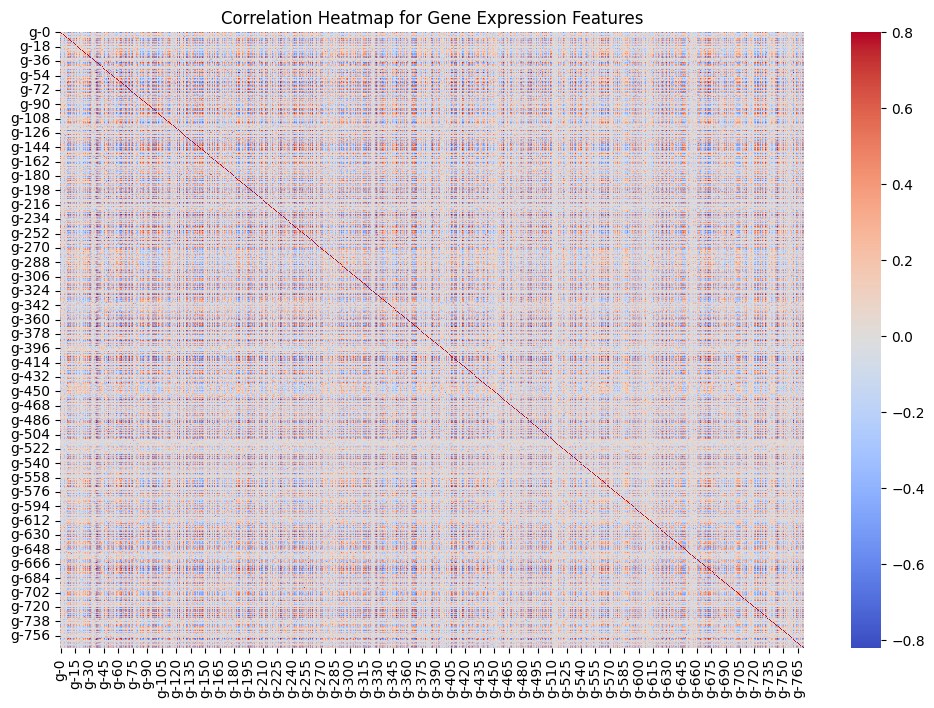

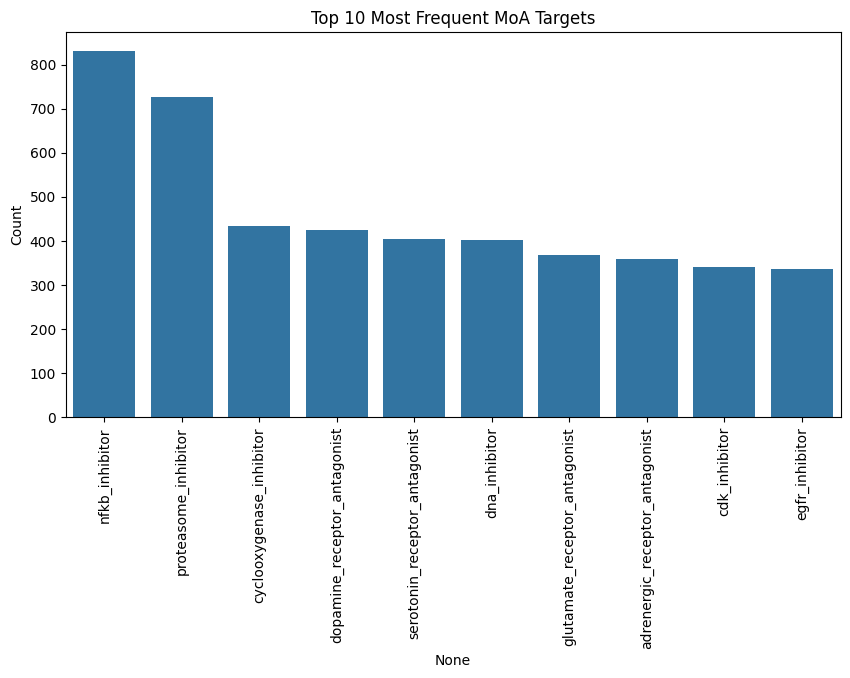

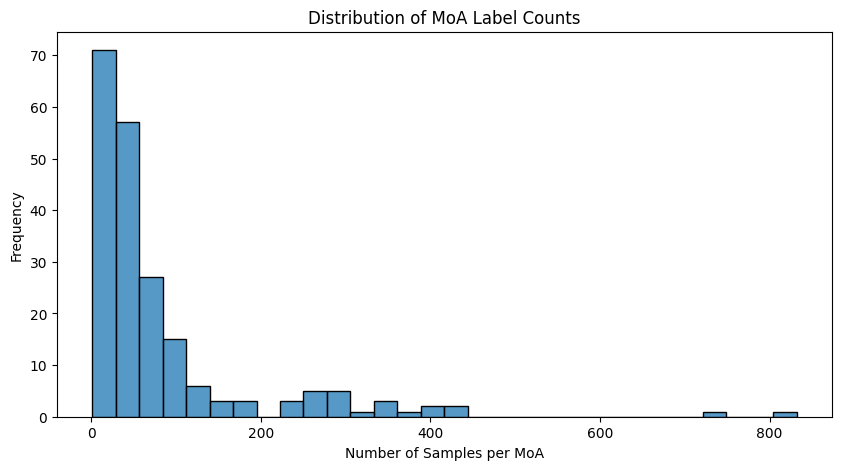

TypeError: could not convert string to float: 'id_000644bb2'

In [4]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_features = pd.read_csv('/content/train_features.csv')
train_targets = pd.read_csv('/content/train_targets_scored.csv')
test_features = pd.read_csv('/content/test_features.csv')

# Basic Info and Overview
print("Train Features Shape:", train_features.shape)
print("Train Targets Shape:", train_targets.shape)
print("Test Features Shape:", test_features.shape)

# Show the first few rows of each dataset
print("Train Features Preview:\n", train_features.head())
print("Train Targets Preview:\n", train_targets.head())
print("Test Features Preview:\n", test_features.head())

# Checking for missing values
print("\nMissing values in train features:\n", train_features.isnull().sum().sum())
print("\nMissing values in train targets:\n", train_targets.isnull().sum().sum())
print("\nMissing values in test features:\n", test_features.isnull().sum().sum())

# Check the distribution of cp_time and cp_dose
print("\ncp_time distribution:\n", train_features['cp_time'].value_counts())
print("\ncp_dose distribution:\n", train_features['cp_dose'].value_counts())

# Visualize cp_time and cp_dose
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='cp_time', data=train_features)
plt.title('Distribution of cp_time')

plt.subplot(1, 2, 2)
sns.countplot(x='cp_dose', data=train_features)
plt.title('Distribution of cp_dose')

plt.tight_layout()
plt.show()

# Visualize correlations among gene expression data (g- features)
gene_features = train_features.filter(like='g-')
gene_corr = gene_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(gene_corr, cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap for Gene Expression Features')
plt.show()

# Checking the distribution of MoA labels (multilabel targets)
target_counts = train_targets.drop(columns=['sig_id']).sum(axis=0)
top_targets = target_counts.sort_values(ascending=False).head(10)  # Top 10 most frequent MoAs

plt.figure(figsize=(10, 5))
sns.barplot(x=top_targets.index, y=top_targets.values)
plt.title('Top 10 Most Frequent MoA Targets')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

# Check for imbalance in MoA targets
plt.figure(figsize=(10, 5))
sns.histplot(target_counts, kde=False, bins=30)
plt.title('Distribution of MoA Label Counts')
plt.xlabel('Number of Samples per MoA')
plt.ylabel('Frequency')
plt.show()

# Visualizing variance in gene and cell viability features
feature_variance = train_features.var().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.histplot(feature_variance, bins=50, kde=False)
plt.title('Distribution of Feature Variance (Gene and Cell Features)')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

# Analyzing Cell Viability features (c- features)
cell_features = train_features.filter(like='c-')
cell_corr = cell_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(cell_corr, cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap for Cell Viability Features')
plt.show()

In [5]:
test_features = pd.read_csv(r'/content/test_features.csv')
train_features = pd.read_csv(r'/content/train_features.csv')


In [10]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
train_features = train_features.drop(columns = ['sig_id'])

In [14]:
train_features.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [19]:
train_features.columns

Index(['cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4',
       'g-5', 'g-6',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=875)

EDA-EXPLORATORY DATA ANALYSIS

In [16]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 875 entries, cp_type to c-99
dtypes: float64(872), int64(1), object(2)
memory usage: 159.0+ MB


In [7]:
features = train_features.columns
print('Features total:', len(features))
gene_expression_features = [feature for feature in features if feature.startswith('g-')]
print('Gene expression features:', len(gene_expression_features))
cell_viability_features = [feature for feature in features if feature.startswith('c-')]
print('Cell viability features:', len(cell_viability_features))
treatment_features = [feature for feature in features if feature.startswith('cp_')]
print('Treatment features:', len(treatment_features))

Features total: 875
Gene expression features: 772
Cell viability features: 100
Treatment features: 3


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load the data, handle mixed types by specifying dtype
train_features = pd.read_csv('train_features.csv', dtype=str, low_memory=False)
train_targets = pd.read_csv('train_targets_scored.csv')
test_features = pd.read_csv('test_features.csv', dtype=str, low_memory=False)

# Remove the "sig_id" column (identifiers)
train_features = train_features.drop(columns=["sig_id"])
test_features = test_features.drop(columns=["sig_id"])
train_targets = train_targets.loc[train_features.index]

# Check the new shapes after alignment
print(f"New train_targets shape: {train_targets.shape}")

# Continue with scaling and splitting
train_features_scaled = scaler.fit_transform(train_features)

# Split training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train_features_scaled, train_targets.drop(columns=["sig_id"]), test_size=0.2, random_state=42)

# One-Hot Encoding for categorical features (cp_type, cp_time, cp_dose)
categorical_cols = ['cp_type', 'cp_time', 'cp_dose']
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit the encoder on train data and transform both train and test
train_categorical_encoded = encoder.fit_transform(train_features[categorical_cols])
test_categorical_encoded = encoder.transform(test_features[categorical_cols])

# Drop the original categorical columns from the features
train_features = train_features.drop(columns=categorical_cols)
test_features = test_features.drop(columns=categorical_cols)

# Concatenate the encoded categorical columns back to the numerical features
train_features = np.hstack([train_features, train_categorical_encoded])
test_features = np.hstack([test_features, test_categorical_encoded])

# Normalize the data using StandardScaler
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)



# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred_proba = model.predict_proba(X_valid)

# Evaluate using logarithmic loss
logloss_score = log_loss(y_valid, y_pred_proba)
print(f"Logarithmic Loss: {logloss_score}")

# Make predictions on test set
test_predictions = model.predict_proba(test_features_scaled)

# Prepare the submission file
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.iloc[:, 1:] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

New train_targets shape: (11181, 207)


ValueError: could not convert string to float: 'trt_cp'

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the data
train_features = pd.read_csv('train_features.csv')
train_targets = pd.read_csv('train_targets_scored.csv')
test_features = pd.read_csv('test_features.csv')

# Remove the "sig_id" column (identifiers) from both train and test sets
train_features = train_features.drop(columns=["sig_id"])
test_features = test_features.drop(columns=["sig_id"])

# Identify categorical and numerical columns
categorical_cols = ['cp_type', 'cp_time', 'cp_dose']
numeric_cols = train_features.columns.difference(categorical_cols)

# One-Hot Encoding for categorical features (cp_type, cp_time, cp_dose)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit the encoder on training categorical data and transform both train and test
train_categorical_encoded = encoder.fit_transform(train_features[categorical_cols])
test_categorical_encoded = encoder.transform(test_features[categorical_cols])

# Standard scaling for numerical features
scaler = StandardScaler()
train_numeric_scaled = scaler.fit_transform(train_features[numeric_cols])
test_numeric_scaled = scaler.transform(test_features[numeric_cols])

# Concatenate the scaled numeric data and encoded categorical data
train_features_processed = np.hstack([train_numeric_scaled, train_categorical_encoded])
test_features_processed = np.hstack([test_numeric_scaled, test_categorical_encoded])

# Ensure the train_targets is aligned in size with the train_features
print(f"Shape of train_features_processed: {train_features_processed.shape}")
print(f"Shape of train_targets: {train_targets.shape}")

# Split the training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train_features_processed, train_targets.drop(columns=["sig_id"]), test_size=0.2, random_state=42)

# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on validation set
y_pred_proba = model.predict_proba(X_valid)

# Evaluate using logarithmic loss
logloss_score = log_loss(y_valid, y_pred_proba)
print(f"Logarithmic Loss: {logloss_score}")

# Make predictions on the test set
test_predictions = model.predict_proba(test_features_processed)

# Prepare the submission file
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.iloc[:, 1:] = test_predictions
sample_submission.to_csv('submission.csv', index=False)

Shape of train_features_processed: (12619, 876)
Shape of train_targets: (23814, 207)


ValueError: Found input variables with inconsistent numbers of samples: [12619, 23814]